In [1]:
# Import libraries:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import missingno as msno

In [2]:

# These are the "Tableau 20" colors as RGB.  
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.  
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)

In [11]:
# Read in data: loans
loans = pd.read_csv('kiva_loans.csv')
loans.tail()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
671200,1340323,0.0,25.0,Livestock,Agriculture,"[True, u'para compara: cemento, arenya y ladri...",PY,Paraguay,Concepción,USD,58.0,2017-07-25 16:55:34+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-25
671201,1340316,25.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-25 06:14:08+00:00,2017-07-24 07:00:00+00:00,2017-07-26 02:09:43+00:00,13.0,1,NaN,female,monthly,2017-07-25
671202,1340334,0.0,25.0,Games,Entertainment,NaN,KE,Kenya,NaN,KES,138.0,2017-07-26 00:02:07+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,NaN,monthly,2017-07-26
671203,1340338,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:12:55+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26
671204,1340339,0.0,25.0,Livestock,Agriculture,"[True, u'to start a turducken farm.'] - this l...",KE,Kenya,NaN,KES,138.0,2017-07-26 06:31:46+00:00,2017-07-25 07:00:00+00:00,NaN,13.0,0,NaN,female,monthly,2017-07-26


Are we missing any values? Lets use the missingno library to check.

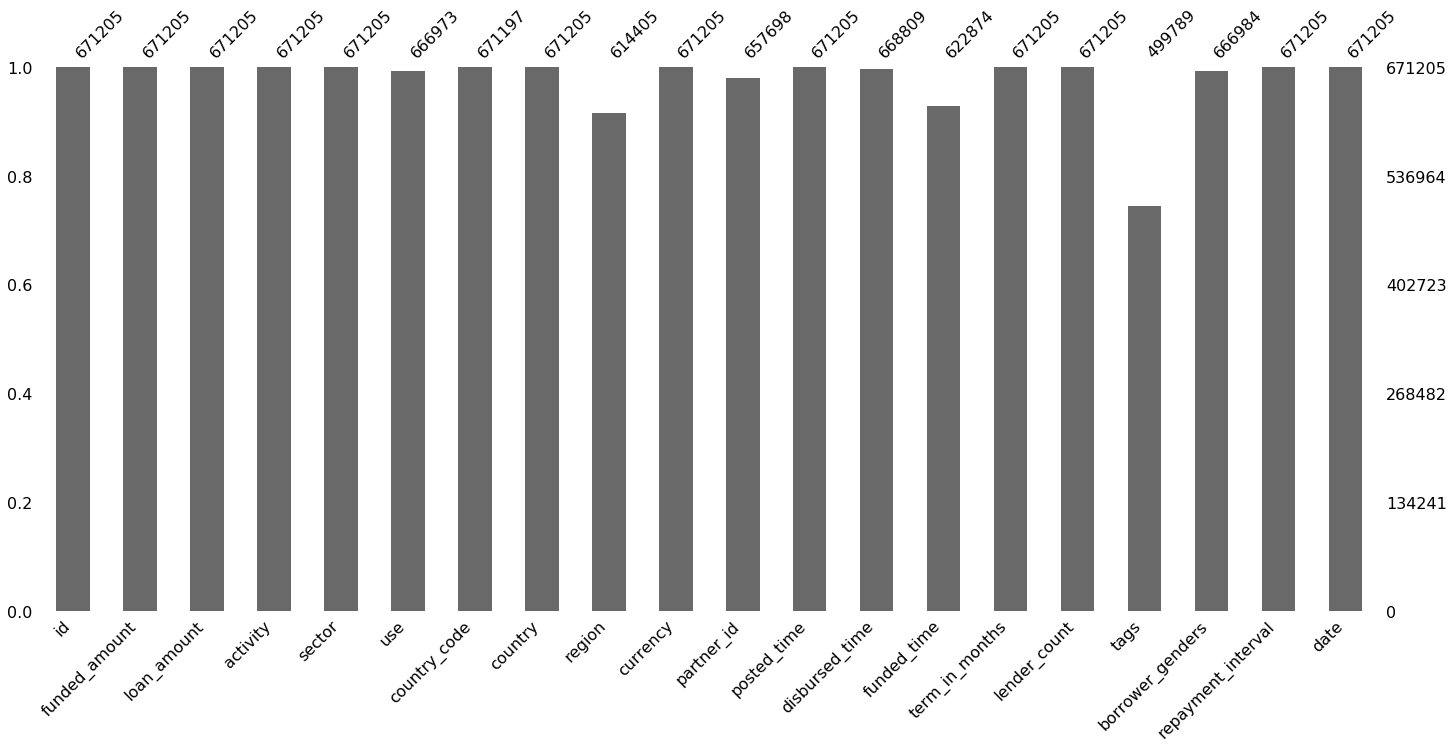

In [4]:
msno.bar(loans)

It looks like the region, funded time, and the tags columns are missing many values but with 60,000 data points this doesn't pose an immediate problem as we can drop a few and still get a tremendous amount of signal.

Lets start exploring the dataset

In [5]:
countries = loans['country'].value_counts()[loans['country'].value_counts()>3400].head(10)
list_countries = list(countries.index) #this is the list of countries that will be most used.

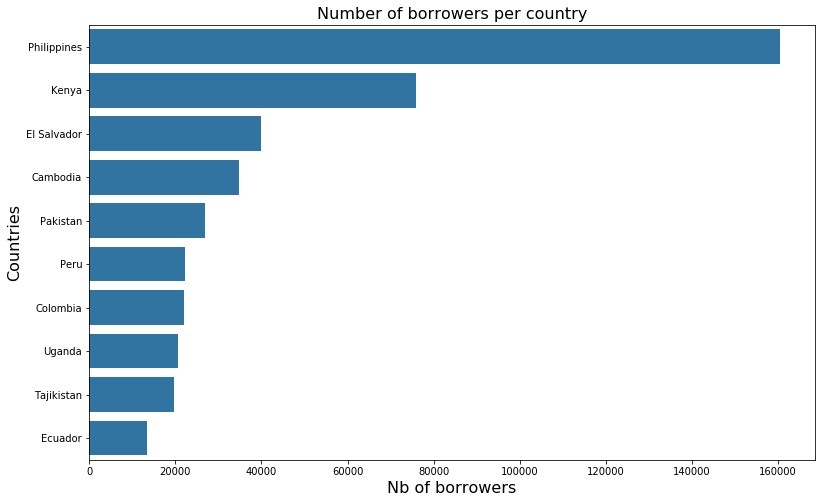

In [6]:
plt.figure(figsize=(13,8))
sns.barplot(y=countries.index, x=countries.values, alpha=1, color=tableau20[0])
plt.title("Number of borrowers per country", fontsize=16)
plt.xlabel("Nb of borrowers", fontsize=16)
plt.ylabel("Countries", fontsize=16)
plt.show();

In [7]:
#to replace values such as "woman, woman, woman, man"
loans['borrower_genders'] = [
    elem if elem in ['female','male'] else 'group' for elem in loans['borrower_genders'] 
]

In [8]:
borrowers = loans['borrower_genders'].value_counts()
labels = (np.array(borrowers.index))
values = (np.array((borrowers / borrowers.sum())*100))
print(values)

[63.54273285 20.06987433 16.38739282]


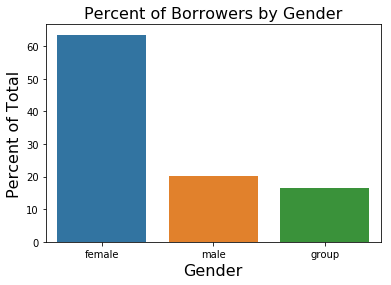

In [10]:
sns.barplot(x=labels, y=values)
plt.title("Percent of Borrowers by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=16)
plt.ylabel("Percent of Total", fontsize=16)
plt.show();

In [35]:
print(plt.style.available)

['seaborn-paper', 'seaborn-bright', 'seaborn-deep', 'Solarize_Light2', 'seaborn-talk', 'fast', 'seaborn-notebook', 'dark_background', 'seaborn-whitegrid', 'seaborn-dark', 'ggplot', 'seaborn-pastel', 'seaborn-dark-palette', 'seaborn-white', 'seaborn-ticks', 'seaborn', '_classic_test', 'seaborn-muted', 'fivethirtyeight', 'seaborn-colorblind', 'seaborn-darkgrid', 'seaborn-poster', 'classic', 'grayscale', 'bmh']


In [38]:
print(plt.get_configdir())

/home/clcarver/.config/matplotlib
